In [130]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import openweathermapy as ow
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

In [2]:
# Extracting csv file and coordiantes
worldcities = "worldcities.csv"
df = pd.read_csv(worldcities)

df.head()

lat_range = (-90, 90)
lng_range = (-170, 170)

In [3]:
# city data and setting the coordinates.
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90, high=90.000, size= 1500)
lngs = np.random.uniform(low=-170.000, high=170.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)
    


651

In [15]:
# Making API call with API key and URL
api_key = "39737f4a776b764c98c33dfba74074f0"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

city_data = []

# Creating a logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creating counters
record_count = 1
set_count = 1

# Looping through all the cities in the list
for i, city in enumerate(cities):
        
    # Grouping cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Creating an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Appending the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=ushuaia
Processing Record 2 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=rikitea
Processing Record 3 of Set 1 | baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=baykit
Processing Record 4 of Set 1 | putina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=putina
Processing Record 5 of Set 1 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=san%20patricio
Processing Record 6 of Set 1 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=port%20alfred
Processing Record 7 of

Processing Record 2 of Set 2 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=nikolskoye
Processing Record 3 of Set 2 | sayyan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=sayyan
Processing Record 4 of Set 2 | samusu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=samusu
City not found. Skipping...
Processing Record 5 of Set 2 | makakilo city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=makakilo%20city
Processing Record 6 of Set 2 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=qaanaaq
Processing Record 7 of Set 2 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=tsihombe
City not found. Skipping...
Processing Record 8 of Set

Processing Record 4 of Set 3 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=geraldton
Processing Record 5 of Set 3 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=san%20quintin
Processing Record 6 of Set 3 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=umzimvubu
City not found. Skipping...
Processing Record 7 of Set 3 | glendive
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=glendive
Processing Record 8 of Set 3 | okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=okhotsk
Processing Record 9 of Set 3 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=cape%20town
Processing Record 10 of Set 3 | kapaa
http://a

Processing Record 7 of Set 4 | yueyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=yueyang
Processing Record 8 of Set 4 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=saint-philippe
Processing Record 9 of Set 4 | cardoso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=cardoso
Processing Record 10 of Set 4 | baker city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=baker%20city
Processing Record 11 of Set 4 | rybnaya sloboda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=rybnaya%20sloboda
Processing Record 12 of Set 4 | cururupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=cururupu
Processing Record 13 of Set 4 | novoseleznevo
http://ap

Processing Record 9 of Set 5 | yarmouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=yarmouth
Processing Record 10 of Set 5 | klyuchi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=klyuchi
Processing Record 11 of Set 5 | mareeba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=mareeba
Processing Record 12 of Set 5 | la libertad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=la%20libertad
Processing Record 13 of Set 5 | dabakala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=dabakala
Processing Record 14 of Set 5 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=avarua
Processing Record 15 of Set 5 | chandler
http://api.openweathermap.org/data/2.5/wea

Processing Record 13 of Set 6 | karauzyak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=karauzyak
City not found. Skipping...
Processing Record 14 of Set 6 | necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=necochea
Processing Record 15 of Set 6 | marzuq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=marzuq
Processing Record 16 of Set 6 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=san%20cristobal
Processing Record 17 of Set 6 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=ilulissat
Processing Record 18 of Set 6 | marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=marcona
City not found. Skipping...
Processing Recor

City not found. Skipping...
Processing Record 16 of Set 7 | diffa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=diffa
Processing Record 17 of Set 7 | ishigaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=ishigaki
Processing Record 18 of Set 7 | kochki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=kochki
Processing Record 19 of Set 7 | pozo colorado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=pozo%20colorado
Processing Record 20 of Set 7 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=tasiilaq
Processing Record 21 of Set 7 | dunhua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=dunhua
Processing Record 22 of Set 7 | miyako
http://api.openwe

Processing Record 18 of Set 8 | port hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=port%20hardy
Processing Record 19 of Set 8 | samalaeulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=samalaeulu
City not found. Skipping...
Processing Record 20 of Set 8 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=iqaluit
Processing Record 21 of Set 8 | lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=lasa
Processing Record 22 of Set 8 | la primavera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=la%20primavera
Processing Record 23 of Set 8 | svetlogorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=svetlogorsk
Processing Record 24 of Set 8 | tereno

Processing Record 21 of Set 9 | moron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=moron
Processing Record 22 of Set 9 | victor harbor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=victor%20harbor
Processing Record 23 of Set 9 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=salalah
Processing Record 24 of Set 9 | yavaros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=yavaros
Processing Record 25 of Set 9 | trairi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=trairi
Processing Record 26 of Set 9 | porto novo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=porto%20novo
Processing Record 27 of Set 9 | utila
http://api.openweathermap.org/data/2.5/w

Processing Record 24 of Set 10 | marica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=marica
Processing Record 25 of Set 10 | faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=faya
Processing Record 26 of Set 10 | poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=poum
Processing Record 27 of Set 10 | orlik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=orlik
Processing Record 28 of Set 10 | kulhudhuffushi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=kulhudhuffushi
Processing Record 29 of Set 10 | todos santos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=todos%20santos
Processing Record 30 of Set 10 | naze
http://api.openweathermap.org/data/2.5/wea

Processing Record 27 of Set 11 | gayeri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=gayeri
Processing Record 28 of Set 11 | changping
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=changping
Processing Record 29 of Set 11 | shwebo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=shwebo
Processing Record 30 of Set 11 | wakkanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=wakkanai
Processing Record 31 of Set 11 | agadez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=agadez
Processing Record 32 of Set 11 | zarubino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=zarubino
Processing Record 33 of Set 11 | dakoro
http://api.openweathermap.org/data/2.5/weather

Processing Record 30 of Set 12 | minuri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=minuri
Processing Record 31 of Set 12 | bacolod
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=bacolod
Processing Record 32 of Set 12 | petatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=petatlan
Processing Record 33 of Set 12 | boksitogorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=boksitogorsk
Processing Record 34 of Set 12 | klembivka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=klembivka
Processing Record 35 of Set 12 | murgab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=murgab
Processing Record 36 of Set 12 | kuusamo
http://api.openweathermap.org/data/

Processing Record 33 of Set 13 | yanam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=yanam
Processing Record 34 of Set 13 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=vestmannaeyjar
Processing Record 35 of Set 13 | hailar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=hailar
Processing Record 36 of Set 13 | sasolburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=sasolburg
Processing Record 37 of Set 13 | clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=clyde%20river
Processing Record 38 of Set 13 | kambove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=39737f4a776b764c98c33dfba74074f0&q=kambove
Processing Record 39 of Set 13 | pucallpa
http://api.openweatherma

In [18]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          588
Cloudiness    588
Country       588
Date          588
Humidity      588
Lat           588
Lng           588
Max Temp      588
Wind Speed    588
dtype: int64

In [19]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,20,AR,1518757200,87,-54.81,-68.31,51.80,17.22
1,rikitea,76,PF,1518760916,100,-23.12,-134.97,78.89,12.59
2,baykit,48,RU,1518760917,72,61.68,96.39,-0.09,4.43
3,putina,0,PE,1518760917,75,-14.91,-69.87,22.19,2.98
4,san patricio,32,PY,1518760918,64,-26.98,-56.83,74.57,3.98


## Plotting Latitude vs Temperature

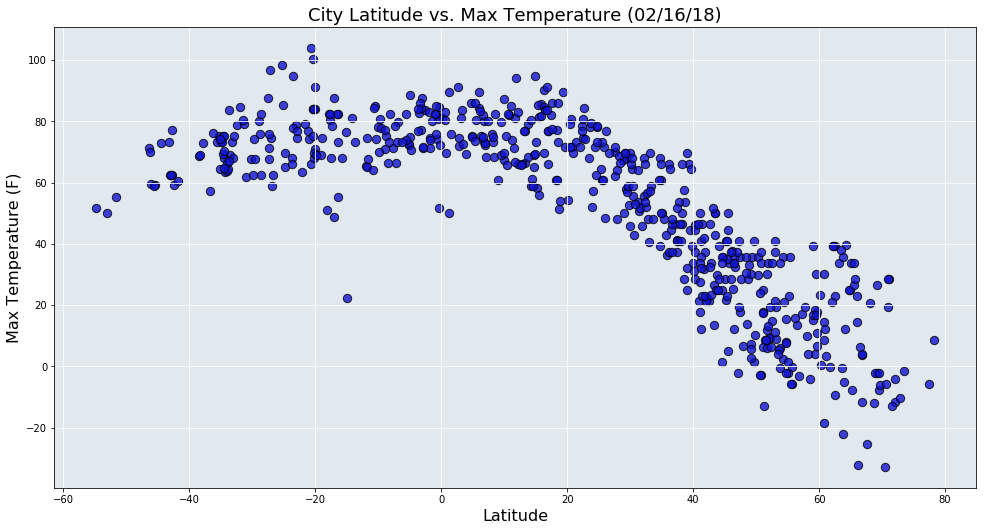

In [132]:
# Scatter plot for latitude vs temperature
plt.figure(figsize=(16,8),edgecolor='white')
plt.axes((0.1, 0.1, 0.8, 0.8), facecolor='#e1e9ef')
plt.scatter(lats,max_temps,edgecolor="black",facecolor='#1013d1',linewidths=1, marker="o", 
            alpha=0.8,s=70, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"),fontsize=18)
plt.ylabel("Max Temperature (F)",fontsize=16)
plt.xlabel("Latitude",fontsize=16)
plt.grid(True,color="white")

# Saving the plot figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

## Plotting Latitude vs Humidity

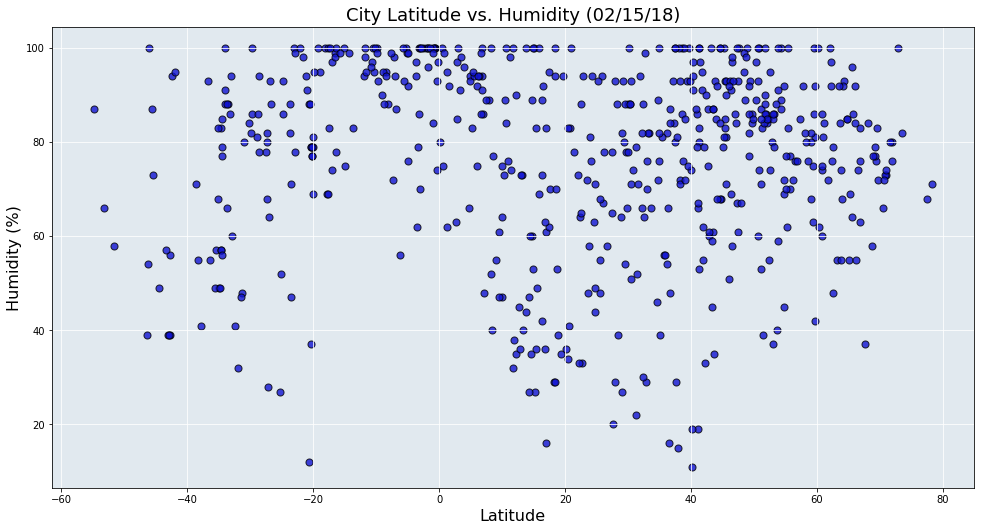

In [125]:
# Scatter plot Latitude vs Humidity
plt.figure(figsize=(16,8),edgecolor='white')
plt.axes((0.1, 0.1, 0.8, 0.8), facecolor='#e1e9ef')
plt.scatter(lats,humidity,edgecolor="black",s=50,facecolor='#1013d1',linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"),fontsize=18)
plt.ylabel("Humidity (%)",fontsize=16)
plt.xlabel("Latitude",fontsize=16)
plt.grid(True,color="white")

# Saving the plot figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

## Plotting Latitude vs Cloudiness

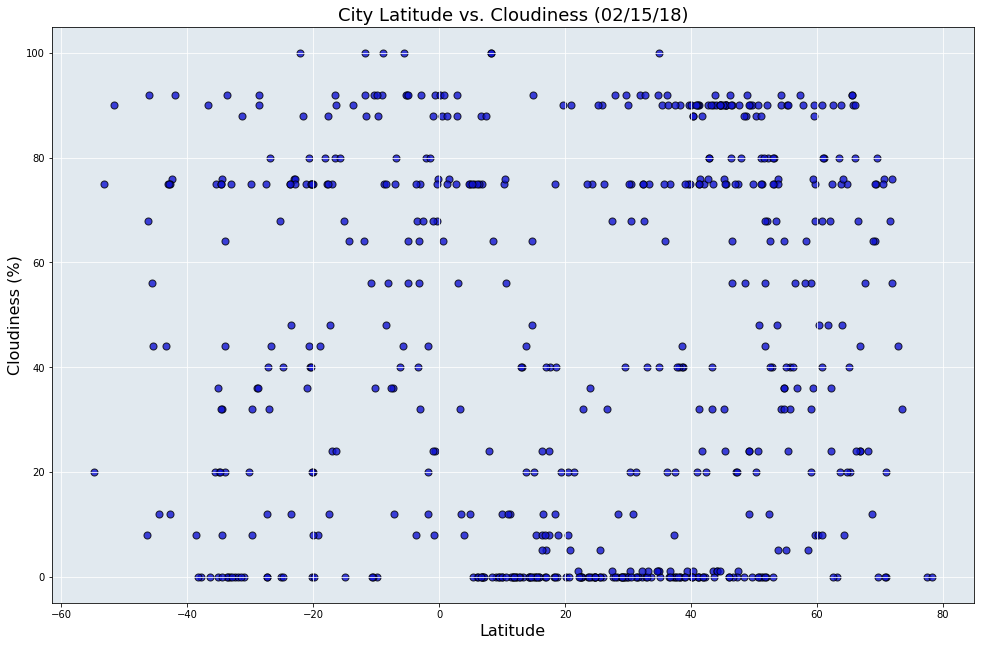

In [128]:
# Scatter plot latitude vs Cloudiness
plt.figure(figsize=(16,10),edgecolor='white')
plt.axes((0.1, 0.1, 0.8, 0.8), facecolor='#e1e9ef')
plt.scatter(lats,cloudiness,edgecolor="black",s=50,facecolor='#1013d1',linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"),fontsize=18)
plt.ylabel("Cloudiness (%)",fontsize=16)
plt.xlabel("Latitude",fontsize=16)
plt.grid(True,color='white')

# Saving the plot figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

## Plotting Latitude vs Wind Speed

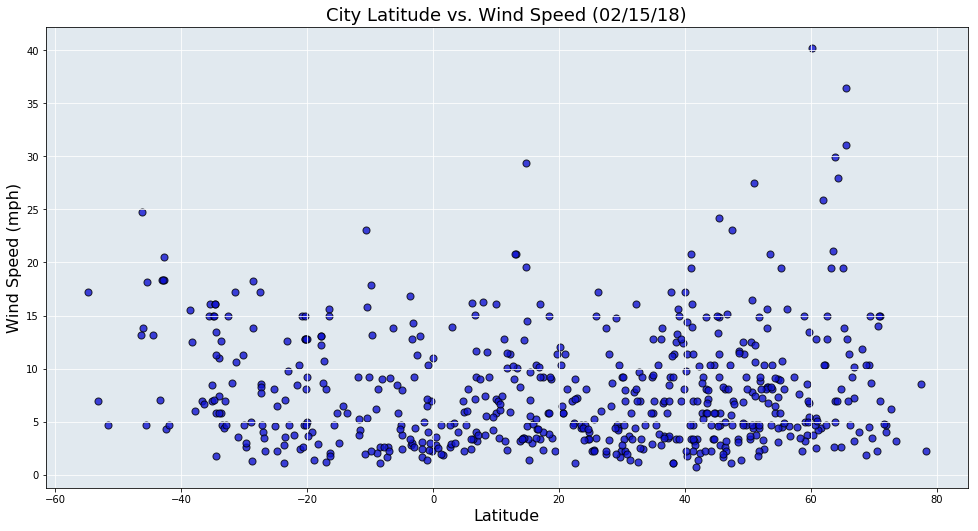

In [129]:
# Scatter plot Latitude vs Wind Speed
plt.figure(figsize=(16,8),edgecolor='white')
plt.axes((0.1, 0.1, 0.8, 0.8), facecolor='#e1e9ef')
plt.scatter(lats,wind_speed,s=50,edgecolor="black",facecolor='#1013d1',linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"),fontsize=18)
plt.ylabel("Wind Speed (mph)",fontsize=16)
plt.xlabel("Latitude",fontsize=16)
plt.grid(True,color='white')

# Saving the plot figure
plt.savefig("Fig4.png")

# Show plot
plt.show()